## Data Cleaning

### Import and Merge dataset

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

!git clone https://github.com/JianingShao/EC1B1.git
df_japan = pd.read_excel('EC1B1/International_Financial_Statistics_Japan.xlsx', skiprows=[0])
df_us = pd.read_excel('EC1B1/International_Financial_Statistics_US.xlsx', skiprows=[0])
df_japan = df_japan.drop(columns=['Unnamed: 1'])
df_us = df_us.drop(columns=['Unnamed: 1','Unnamed: 0'])

fatal: destination path 'EC1B1' already exists and is not an empty directory.


In [8]:
df = pd.merge(left=df_japan, right=df_us, left_index=True, right_index=True, suffixes=('_japan', '_us'))
df.rename(columns = {'Economic Activity, Industrial Production, Index':'Economic Activity, Industrial Production, Index_japan',
                    'Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate':'Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate_japan',
                    'Unnamed: 0':'Date'},
                   inplace=True)

In [9]:
df

,Date,"Economic Activity, Industrial Production, Index_japan","Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate_japan","International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar_japan","Prices, Consumer Price Index, All items, Index_japan","International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar_us","Prices, Consumer Price Index, All items, Index_us"
0,Jan 1960,11.234317,360.00,1453.300000,18.751149,21478.100000,13.436946
1,Feb 1960,12.638607,360.00,1446.335000,18.770130,21395.700000,13.482806
2,Mar 1960,13.629870,360.00,1486.370000,18.713187,21344.700000,13.482806
3,Apr 1960,12.721212,360.00,1510.405000,18.827063,21278.000000,13.528666
4,May 1960,12.803817,360.00,1544.475000,18.997872,21234.300000,13.528666
...,...,...,...,...,...,...,...
367,Aug 1990,97.701784,147.42,77255.032093,94.491160,78908.838357,60.351608
368,Sep 1990,106.067686,138.99,77520.168874,95.216421,80024.166133,60.856066
369,Oct 1990,108.059568,129.73,78465.270774,96.252508,82852.196532,61.222946
370,Nov 1990,106.466063,129.08,78941.101486,96.045291,83059.402774,61.360525


### Construct variables to use (in a new dataframe)

In [10]:
# Construct a new dataframe to store the variables constructed
df_japan_us = pd.DataFrame()
# Format the month and year variable into a date format
df_japan_us['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b %Y').strftime('%Y-%m'))
# Construct log exchange rate of japan
df_japan_us['log_exchange_rate_japan'] = np.log(df['Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate_japan'])
# Construct difference of log exchange rate vs previous month of japan
df_japan_us['diff_log_exchange_rate_japan'] = df_japan_us['log_exchange_rate_japan'].diff()
# Construct the monthly inflation rate of japan
df_japan_us['monthly_inflation_rate_japan'] = df['Prices, Consumer Price Index, All items, Index_japan'].pct_change().multiply(100)
# Construct log industrial production of japan
df_japan_us['log_industrial_production_japan'] = np.log(df['Economic Activity, Industrial Production, Index_japan'])
# Construct monthly growth in industrial production of japan
df_japan_us['monthly_growth_industrial_production_japan'] = df_japan_us['log_industrial_production_japan'].diff().multiply(100)
# Construct growth in industrial production versus 12 months ago of japan
df_japan_us['industrial_production_growth_vs_12m_japan'] = (df_japan_us['log_industrial_production_japan'] - df_japan_us['log_industrial_production_japan'].shift(12))*100
df_japan_us['industrial_production_growth_vs_12m_japan'] = df_japan_us['industrial_production_growth_vs_12m_japan'].fillna(0) # those in the first year have no data 12 months ago but are filled 0 for further outlier identifictaion
# Construct an index of the value of international reserves of japan(value of reserves at January 1960 = 100)
base = df['International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar_japan'][0]
df_japan_us['international_reserve_index_japan'] = (df['International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar_japan']/base)*100

In [11]:
# Construct the monthly inflation rate of the US
df_japan_us['monthly_inflation_rate_us'] = df['Prices, Consumer Price Index, All items, Index_us'].pct_change().multiply(100)
# Construct an index of the value of international reserves of the US (value of reserves at January 1960 = 100)
base = df['International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar_us'][0]
df_japan_us['international_reserve_index_us'] = (df['International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar_us']/base)*100

In [12]:
df_japan_us

,Date,log_exchange_rate_japan,diff_log_exchange_rate_japan,monthly_inflation_rate_japan,log_industrial_production_japan,monthly_growth_industrial_production_japan,industrial_production_growth_vs_12m_japan,international_reserve_index_japan,monthly_inflation_rate_us,international_reserve_index_us
0,1960-01,5.886104,NaN,NaN,2.418973,NaN,0.000000,100.000000,NaN,100.000000
1,1960-02,5.886104,0.000000,0.101226,2.536756,11.778304,0.000000,99.520746,0.341297,99.616353
2,1960-03,5.886104,0.000000,-0.303372,2.612264,7.550755,0.000000,102.275511,0.000000,99.378902
3,1960-04,5.886104,0.000000,0.608535,2.543271,-6.899287,0.000000,103.929333,0.340136,99.068353
4,1960-05,5.886104,0.000000,0.907254,2.549743,0.647251,0.000000,106.273653,0.000000,98.864890
...,...,...,...,...,...,...,...,...,...,...
367,1990-08,4.993286,-0.012538,0.440529,4.581920,-9.243328,4.695698,5315.835141,0.920245,367.392080
368,1990-09,4.934402,-0.058884,0.767544,4.664077,8.215762,4.513488,5334.078916,0.835866,372.584941
369,1990-10,4.865455,-0.068947,1.088139,4.682683,1.860519,7.460437,5399.110355,0.602864,385.751982
370,1990-11,4.860432,-0.005023,-0.215285,4.667826,-1.485635,5.578369,5431.851751,0.224719,386.716715


### Identify ourliers

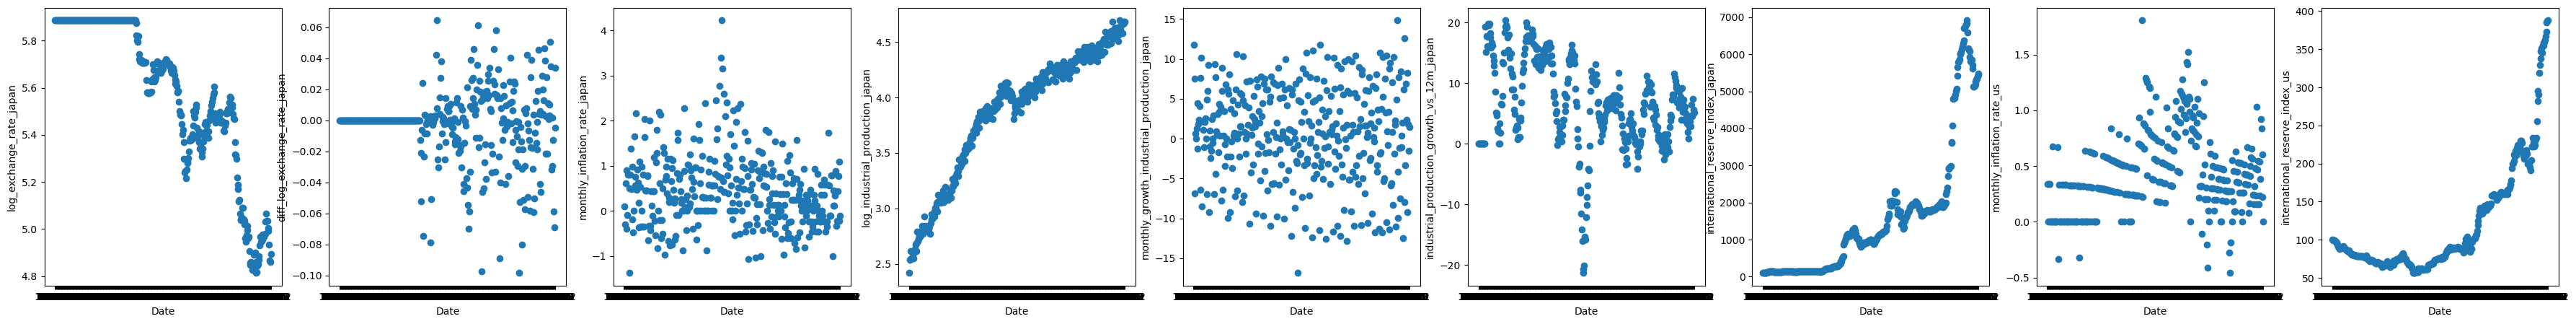

In [7]:
# Plot the scatter plot of all variables with respect to date
x = df_japan_us.iloc[:, 0]
num_cols = len(df_japan_us.columns) - 1
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5*num_cols, 5))
for i in range(1, len(df_japan_us.columns)):
    y = df_japan_us.iloc[:, i]
    axes[i-1].scatter(x, y)
    axes[i-1].set_xlabel(df_japan_us.columns[0])
    axes[i-1].set_ylabel(df_japan_us.columns[i])
plt.show()

In [39]:
# I use z-score>4 instead of IQR or z>3 because they will result in too many outliers
def replace_outliers_with_nan(col):
    z_scores = (col - col.mean()) / col.std(ddof=0)
    col[z_scores.abs() > 4] = np.nan
    return col
df_japan_us.iloc[:,1:] = df_japan_us.iloc[:,1:].apply(replace_outliers_with_nan)

In [40]:
print(df_japan_us.isna().sum())
# The values being setted missing roughly correspond to the existence of possible outliers in each col shown in the scatterplot
# The presence of 1 NaN in diff_log_exchange_rate_japan, monthly_inflation_rate_japan, monthly_growth_industrial_production_japan and monthly_inflation_rate_us are due to the missing of the first entry

Date                                          0
log_exchange_rate_japan                       0
diff_log_exchange_rate_japan                  3
monthly_inflation_rate_japan                  2
log_industrial_production_japan               0
monthly_growth_industrial_production_japan    1
industrial_production_growth_vs_12m_japan     0
international_reserve_index_japan             0
monthly_inflation_rate_us                     1
international_reserve_index_us                0
dtype: int64


### Interpolate missing data

In [43]:
# Fill gaps in the data with the mean of the value of the series before and after the gap (don't need to care about the first entries which should be missing)
for col in df_japan_us.iloc[:,1:].columns:
    before = df_japan_us[col].shift(1) 
    after = df_japan_us[col].shift(-1)
    mean = (before + after) / 2
    df_japan_us.loc[df_japan_us[col].isna(), col] = mean[df_japan_us[col].isna()]

### Construct a series for monthly real exchange exchange rate growth

In [11]:
# Construct a series for monthly real exchange exchange rate growth
# I first construct the real exchange rate by the formula Nominal exchange rate(yen per dollar) * Price level(US) / Price level(Japan)
# The resulted real exchange rate is also yen/dollar
# Then I take the log of the real exchange rate and take the difference which is roughly equal to the growth rate
real_exchange_rate_log = np.log(df['Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate_japan'] * df['Prices, Consumer Price Index, All items, Index_us']) / df['Prices, Consumer Price Index, All items, Index_japan']
df_japan_us['real_exchange_rate_growth'] = real_exchange_rate_log.diff()

In [12]:
df_japan_us

,Date,log_exchange_rate_japan,diff_log_exchange_rate_japan,monthly_inflation_rate_japan,log_industrial_production_japan,monthly_growth_industrial_production_japan,industrial_production_growth_vs_12m_japan,international_reserve_index_japan,monthly_inflation_rate_us,international_reserve_index_us,real_exchange_rate_growth
0,1960-01,5.886104,NaN,NaN,2.418973,NaN,0.000000,100.000000,NaN,100.000000,NaN
1,1960-02,5.886104,0.000000,0.101226,2.536756,11.778304,0.000000,99.520746,0.341297,99.616353,-0.000276
2,1960-03,5.886104,0.000000,-0.303372,2.612264,7.550755,0.000000,102.275511,0.000000,99.378902,0.001376
3,1960-04,5.886104,0.000000,0.608535,2.543271,-6.899287,0.000000,103.929333,0.340136,99.068353,-0.002563
4,1960-05,5.886104,0.000000,0.907254,2.549743,0.647251,0.000000,106.273653,0.000000,98.864890,-0.004055
...,...,...,...,...,...,...,...,...,...,...,...
367,1990-08,4.993286,-0.012538,0.440529,4.581920,-9.243328,4.695698,5315.835141,0.920245,367.392080,-0.000460
368,1990-09,4.934402,-0.058884,0.767544,4.664077,8.215762,4.513488,5334.078916,0.835866,372.584941,-0.001264
369,1990-10,4.865455,-0.068947,1.088139,4.682683,1.860519,7.460437,5399.110355,0.602864,385.751982,-0.001676
370,1990-11,4.860432,-0.005023,-0.215285,4.667826,-1.485635,5.578369,5431.851751,0.224719,386.716715,0.000172


## Data Analysis

In [13]:
# The date Japan left the Bretton Woods System
leave_date = df_japan_us.loc[df_japan_us['diff_log_exchange_rate_japan'] != 0, 'Date'].iloc[1]
leave_date

'1971-08'

### Graph plotting

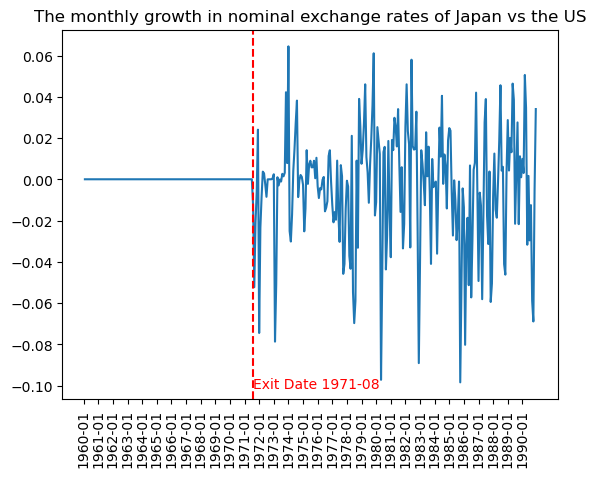

In [14]:
# Plot a time series graph of the monthly growth in nominal exchange rates of your country, versus the US dollar
fig,ax = plt.subplots()
plt.plot(df_japan_us['Date'],df_japan_us['diff_log_exchange_rate_japan'])
ax.axvline(leave_date, color='red', linestyle='--')
ax.annotate('Exit Date 1971-08',xy=(leave_date, ax.get_ylim()[0]), xytext=(leave_date, ax.get_ylim()[0]*0.95), color='red')
plt.xticks(df_japan_us['Date'][::12], rotation = 90)
plt.title('The monthly growth in nominal exchange rates of Japan vs the US')
plt.show()

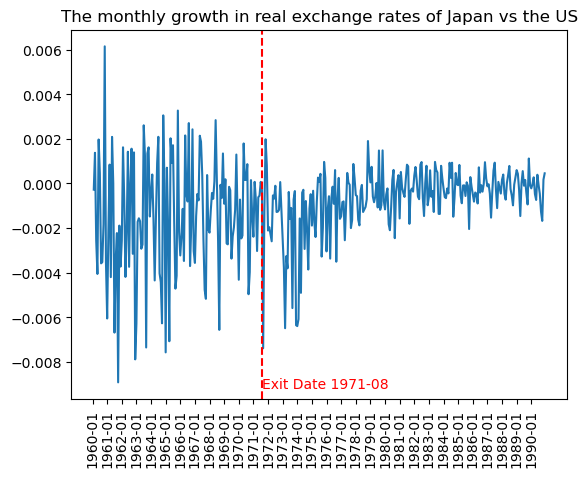

In [15]:
# Plot a time series graph of the monthly growth in real exchange rates of Japan, versus the US dollar
fig,ax = plt.subplots()
plt.plot(df_japan_us['Date'],df_japan_us['real_exchange_rate_growth'])
ax.axvline(leave_date, color='red', linestyle='--')
ax.annotate('Exit Date 1971-08',xy=(leave_date, ax.get_ylim()[0]), xytext=(leave_date, ax.get_ylim()[0]*0.95), color='red')
plt.xticks(df_japan_us['Date'][::12], rotation = 90)
plt.title('The monthly growth in real exchange rates of Japan vs the US')
plt.show()

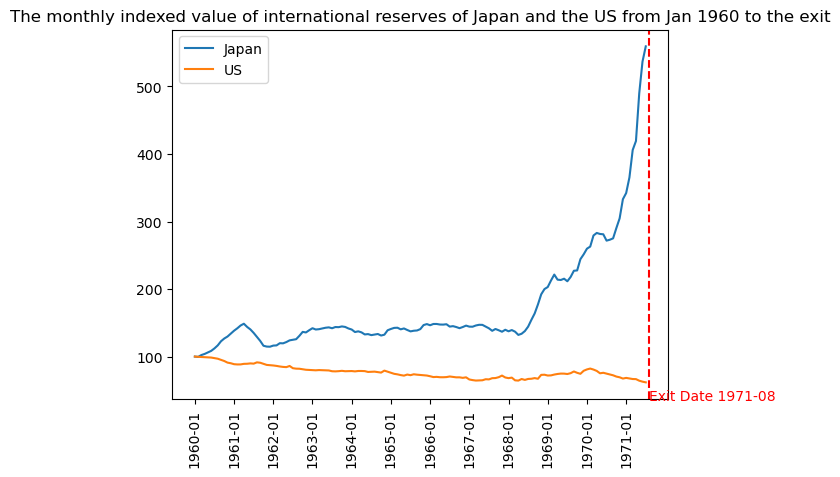

In [16]:
# Plot a time series graph of the monthly indexed value of international reserves of Japan and the US from January 1960 until the exit of the US from Bretton Woods
fig,ax = plt.subplots()
df_japan_us_1 = df_japan_us[df_japan_us['Date'] < leave_date]
plt.plot(df_japan_us_1['Date'],df_japan_us_1['international_reserve_index_japan'],label='Japan')
plt.plot(df_japan_us_1['Date'],df_japan_us_1['international_reserve_index_us'],label='US')
ax.axvline(leave_date, color='red', linestyle='--')
ax.annotate('Exit Date 1971-08',xy=(leave_date, ax.get_ylim()[0]), xytext=(leave_date, ax.get_ylim()[0]*0.95), color='red')
plt.xticks(df_japan_us_1['Date'][::12], rotation = 90)
plt.title('The monthly indexed value of international reserves of Japan and the US from Jan 1960 to the exit')
plt.legend()
plt.show()

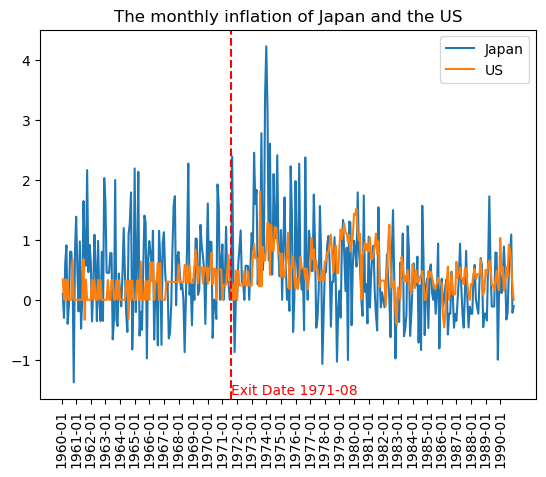

In [17]:
# Plot a time series graph of monthly inflation
fig,ax = plt.subplots()
plt.plot(df_japan_us['Date'],df_japan_us['monthly_inflation_rate_japan'],label='Japan')
plt.plot(df_japan_us['Date'],df_japan_us['monthly_inflation_rate_us'],label='US')
ax.axvline(leave_date, color='red', linestyle='--')
ax.annotate('Exit Date 1971-08',xy=(leave_date, ax.get_ylim()[0]), xytext=(leave_date, ax.get_ylim()[0]*0.95), color='red')
plt.xticks(df_japan_us['Date'][::12], rotation = 90)
plt.title('The monthly inflation of Japan and the US')
plt.legend()
plt.show()

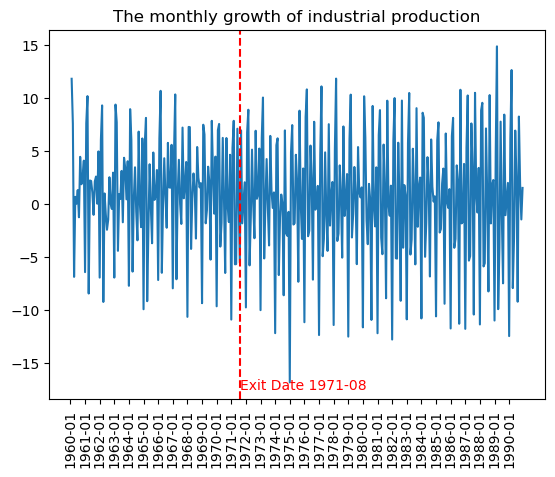

In [18]:
# Plot a time series graph of the monthly growth in industrial production
fig,ax = plt.subplots()
plt.plot(df_japan_us['Date'],df_japan_us['monthly_growth_industrial_production_japan'])
ax.axvline(leave_date, color='red', linestyle='--')
ax.annotate('Exit Date 1971-08',xy=(leave_date, ax.get_ylim()[0]), xytext=(leave_date, ax.get_ylim()[0]*0.95), color='red')
plt.xticks(df_japan_us['Date'][::12], rotation = 90)
plt.title('The monthly growth of industrial production')
plt.show()

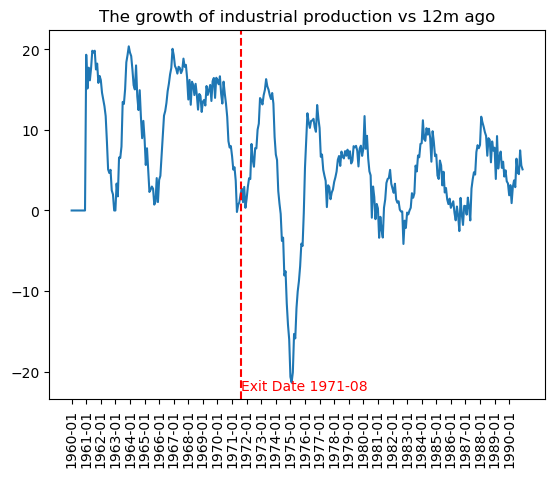

In [19]:
# Plot a time series graph of the growth in industrial production versus 12 months ago
fig,ax = plt.subplots()
plt.plot(df_japan_us['Date'],df_japan_us['industrial_production_growth_vs_12m_japan'])
ax.axvline(leave_date, color='red', linestyle='--')
ax.annotate('Exit Date 1971-08',xy=(leave_date, ax.get_ylim()[0]), xytext=(leave_date, ax.get_ylim()[0]*0.95), color='red')
plt.xticks(df_japan_us['Date'][::12], rotation = 90)
plt.title('The growth of industrial production vs 12m ago')
plt.show()

### Comparison Statistics

Before leaving the Bretton Woods System

In [77]:
df_japan_us['Date'] = pd.to_datetime(df_japan_us['Date'], format='%Y-%m')
exit_date = pd.to_datetime(leave_date, format='%Y-%m')
df_before = df_japan_us.loc[df_japan_us['Date'] < (exit_date - pd.DateOffset(months=10))]
# The monthly growth of nominal exchange rates versus the US dollar
n_exchange_rate_before = df_before['diff_log_exchange_rate_japan'].std()
# The monthly growth of real exchange rates versus the US dollar
r_exchange_rate_before = df_before['real_exchange_rate_growth'].std()
# The inflation rate in Japan
inflation_rate_before = df_before['monthly_inflation_rate_japan'].std()
# The difference between the inflation in your country versus the United States
diff_inflation_rate_before = (df_before['monthly_inflation_rate_japan']-df_before['monthly_inflation_rate_us']).std()
# The 12-monthly industrial production growth
industrial_production_12m_before = df_before['industrial_production_growth_vs_12m_japan'].std()

After leaving the Bretton Woods System

In [78]:
df_japan_us['Date'] = pd.to_datetime(df_japan_us['Date'], format='%Y-%m')
exit_date = pd.to_datetime(leave_date, format='%Y-%m')
df_before = df_japan_us.loc[df_japan_us['Date'] > (exit_date + pd.DateOffset(months=10))]
# The monthly growth of nominal exchange rates versus the US dollar
n_exchange_rate_after = df_before['diff_log_exchange_rate_japan'].std()
# The monthly growth of real exchange rates versus the US dollar
r_exchange_rate_after = df_before['real_exchange_rate_growth'].std()
# The inflation rate in Japan
inflation_rate_after = df_before['monthly_inflation_rate_japan'].std()
# The difference between the inflation in your country versus the United States
diff_inflation_rate_after = (df_before['monthly_inflation_rate_japan']-df_before['monthly_inflation_rate_us']).std()
# The 12-monthly industrial production growth
industrial_production_12m_after = df_before['industrial_production_growth_vs_12m_japan'].std()

In [79]:
data_table = {
    'Variable': ['Nominal exchange rate', 'Real exchange rate', 'Inflation rate (Japan)', 
                 'Difference in inflation rates', '12-month industrial production growth'],
    'Before Bretton Woods (std)': [n_exchange_rate_before, r_exchange_rate_before, inflation_rate_before,
                                   diff_inflation_rate_before, industrial_production_12m_before],
    'After Bretton Woods (std)': [n_exchange_rate_after, r_exchange_rate_after, inflation_rate_after, 
                                  diff_inflation_rate_after, industrial_production_12m_after],
    'Std ratio (before/after)': [n_exchange_rate_before / n_exchange_rate_after, 
                                 r_exchange_rate_before / r_exchange_rate_after,
                                 inflation_rate_before / inflation_rate_after,
                                 diff_inflation_rate_before / diff_inflation_rate_after,
                                 industrial_production_12m_before / industrial_production_12m_after]}
table = pd.DataFrame(data_table)
table.set_index('Variable', inplace=True)
table

,Before Bretton Woods (std),After Bretton Woods (std),Std ratio (before/after)
Variable,,,
Nominal exchange rate,0.000000,0.027253,0.000000
Real exchange rate,0.002712,0.001347,2.013357
Inflation rate (Japan),0.764278,0.795106,0.961228
Difference in inflation rates,0.801848,0.772584,1.037878
12-month industrial production growth,6.465988,6.391469,1.011659
